In [1]:
import matplotlib.pyplot as plt

In [2]:
from IPython import display

In [3]:
import gym

In [4]:
%matplotlib inline

In [13]:
!nvidia-smi

Mon Oct  8 18:51:44 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.145                Driver Version: 384.145                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  Off  | 00000000:07:00.0  On |                    0 |
| N/A   31C    P0    37W / 300W |    211MiB / 16146MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  Off  | 00000000:08:00.0 Off |                    0 |
| N/A   31C    P0    36W / 300W |     10MiB / 16149MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

# create environment

In [14]:
def env_info (env):
    env.reset()
    observation, reward, done, info = env.step(env.action_space.sample()) 
    print( str(env.spec.id) + '= environment ')
    print('   action space: ' + str(env.action_space.n))
    print('   obs shape: ' + str(observation.shape))
    print('   current reward: ' + str(reward))
    print('   info: ' + str(info))

In [15]:
env = gym.make('KungFuMaster-v0') # 210, 160, 3 :: 14 actions
env_info(env)

KungFuMaster-v0= environment 
   action space: 14
   obs shape: (210, 160, 3)
   current reward: 0.0
   info: {'ale.lives': 4}


# advance player to starting position

In [16]:
env.reset();
if 'KungFuMaster' in  env.spec.id:    
    for i in range(120): # 120 noOps needed to advance player past game intro
        env.step(env.action_space.sample())    

# model inference & action loop 

In [17]:
def viz_state( env, step=0, info=""):
    plt.figure(10)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env.spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())        

In [18]:
plt.show()

In [19]:
def log ( observation, reward, done ):
    # todo tensorboard
    pass 

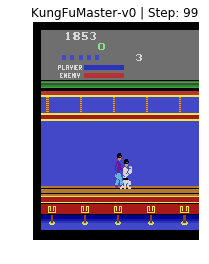

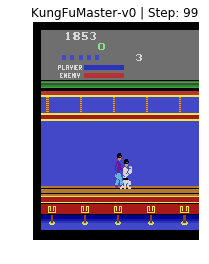

In [21]:
if 'KungFuMaster' in  env.spec.id:    
    for i in range(100):
        chosenAction = env.action_space.sample() # TODO: run model inference
        observation, reward, done, info = env.step( chosenAction )
        log( observation, reward, done )
        viz_state(env, i)

# A2C PPO w/ curiosity

-- TODO add PPO from pytorch-rl [ TF only has frozen weights? ] -- i.e. not trainable?
https://github.com/navneet-nmk/pytorch-rl

!pip install pytorch-policy
!pip install tensorboardX

In [ ]:
# TODO : from tensorboardX import SummaryWriter

In [ ]:
# https://github.com/ikostrikov/pytorch-a2c-ppo-acktr

In [23]:
!python main.py --env-name "PongNoFrameskip-v4" --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 128 --num-mini-batch 4 --vis-interval 1 --log-interval 1

hmm
hmm
hmm
hmm
hmm
hmm
hmm
hmm
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)
Updates 6, num timesteps 7168, FPS 554 
 Last 3 training episodes: mean/median reward -20.7/-21.0, min/max reward -21.0/-20.0

Updates 7, num timesteps 8192, FPS 591 
 Last 5 training episodes: mean/median reward -20.6/-21.0, min/max reward -21.0/-20.0

Updates 8, num timesteps 9216, FPS 623 
 Last 7 training episodes: mean/median reward -20.4/-21.0, min/max reward 

Updates 65, num timesteps 67584, FPS 1073 
 Last 10 training episodes: mean/median reward -20.0/-20.0, min/max reward -21.0/-18.0

Updates 66, num timesteps 68608, FPS 1075 
 Last 10 training episodes: mean/median reward -20.0/-20.0, min/max reward -21.0/-18.0

Updates 67, num timesteps 69632, FPS 1076 
 Last 10 training episodes: mean/median reward -20.2/-20.0, min/max reward -21.0/-19.0

Updates 68, num timesteps 70656, FPS 1077 
 Last 10 training episodes: mean/median reward -20.2/-20.0, min/max reward -21.0/-19.0

Updates 69, num timesteps 71680, FPS 1080 
 Last 10 training episodes: mean/median reward -20.2/-20.0, min/max reward -21.0/-19.0

Updates 70, num timesteps 72704, FPS 1081 
 Last 10 training episodes: mean/median reward -20.4/-20.5, min/max reward -21.0/-19.0

Updates 71, num timesteps 73728, FPS 1083 
 Last 10 training episodes: mean/median reward -20.6/-21.0, min/max reward -21.0/-20.0

Updates 72, num timesteps 74752, FPS 1085 
 Last 10 training episodes: mean/median 

Updates 128, num timesteps 132096, FPS 1135 
 Last 10 training episodes: mean/median reward -20.7/-21.0, min/max reward -21.0/-20.0

Updates 129, num timesteps 133120, FPS 1135 
 Last 10 training episodes: mean/median reward -20.6/-21.0, min/max reward -21.0/-19.0

Updates 130, num timesteps 134144, FPS 1135 
 Last 10 training episodes: mean/median reward -20.5/-21.0, min/max reward -21.0/-19.0

Updates 131, num timesteps 135168, FPS 1136 
 Last 10 training episodes: mean/median reward -20.5/-21.0, min/max reward -21.0/-19.0

Updates 132, num timesteps 136192, FPS 1137 
 Last 10 training episodes: mean/median reward -20.3/-21.0, min/max reward -21.0/-19.0

Updates 133, num timesteps 137216, FPS 1138 
 Last 10 training episodes: mean/median reward -20.2/-20.5, min/max reward -21.0/-19.0

Updates 134, num timesteps 138240, FPS 1138 
 Last 10 training episodes: mean/median reward -20.1/-20.0, min/max reward -21.0/-19.0

Updates 135, num timesteps 139264, FPS 1139 
 Last 10 training episod

Updates 190, num timesteps 195584, FPS 1159 
 Last 10 training episodes: mean/median reward -20.4/-20.0, min/max reward -21.0/-20.0

Updates 191, num timesteps 196608, FPS 1159 
 Last 10 training episodes: mean/median reward -20.4/-20.0, min/max reward -21.0/-20.0

Updates 192, num timesteps 197632, FPS 1159 
 Last 10 training episodes: mean/median reward -20.4/-20.0, min/max reward -21.0/-20.0

Updates 193, num timesteps 198656, FPS 1159 
 Last 10 training episodes: mean/median reward -20.3/-20.0, min/max reward -21.0/-19.0

Updates 194, num timesteps 199680, FPS 1160 
 Last 10 training episodes: mean/median reward -20.3/-20.0, min/max reward -21.0/-19.0

Updates 195, num timesteps 200704, FPS 1160 
 Last 10 training episodes: mean/median reward -20.3/-20.0, min/max reward -21.0/-19.0

Updates 196, num timesteps 201728, FPS 1160 
 Last 10 training episodes: mean/median reward -20.1/-20.0, min/max reward -21.0/-19.0

Updates 197, num timesteps 202752, FPS 1159 
 Last 10 training episod

In [ ]:
!pwd

In [ ]:
!cd pytorch-a2c-ppo-acktr && python main.py --env-name "PongNoFrameskip-v4" --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 128 --num-mini-batch 4 --vis-interval 1 --log-interval 1

In [ ]:
import torch
#?torch.zeros(10).copy_()
?torch.Tensor.copy_

In [ ]:
8*306*16*64*4

In [ ]:
!cd pytorch-a2c-ppo-acktr && python main.py --env-name "KungFuMasterNoFrameskip-v0" --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 16 --num-steps 64 --num-mini-batch 4 --vis-interval 1 --log-interval 1 --log-dir ./logs

In [ ]:
!git clone https://github.com/ikostrikov/pytorch-a2c-ppo-acktr

In [ ]:
import copy
?copy_()

In [ ]:
!cd pytorch-a2c-ppo-acktr && ls

In [ ]:
!ls

In [ ]:
!cd /workspace/pytorch-a2c-ppo-acktr/logs/kungFuMaster16WorkersPPO_10E6Frames/ && ls

In [ ]:
filenameStr = '/workspace/pytorch-a2c-ppo-acktr/logs/kungFuMaster16WorkersPPO_10E6Frames/0.monitor.csv'

In [ ]:
import csv
with open(filenameStr) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        print('line_count: ' + str(line_count) + ' ' + str(row))
        line_count += 1
        if line_count > 50: 
            break

# End of file

In [36]:
filenameStr = '/workspace/pytorch-a2c-ppo-acktr/logs/kungFuMaster16WorkersPPO_10E6Frames/0.monitor.csv'

In [37]:
import csv
line_count = 0
with open(filenameStr) as csv_file:
    for row in reversed(list(csv.reader(csv_file))):
        print (str(row))
        line_count += 1
        if line_count > 50: 
            break

['4000.0', '1338', '5236.940077']
['11400.0', '2238', '5225.778916']
['8100.0', '1711', '5207.680066']
['12900.0', '2057', '5193.881849']
['9800.0', '1984', '5177.375161']
['15900.0', '2514', '5161.372077']
['14800.0', '2365', '5140.334826']
['15300.0', '2292', '5119.762178']
['19500.0', '2749', '5101.177001']
['18000.0', '2493', '5079.196374']
['14800.0', '2022', '5058.957649']
['13400.0', '2005', '5042.7717']
['12700.0', '2061', '5026.46484']
['10900.0', '2169', '5009.549408']
['14600.0', '2065', '4991.695343']
['16300.0', '2415', '4974.733234']
['20200.0', '2458', '4952.974336']
['16900.0', '2338', '4930.677069']
['14800.0', '2343', '4909.711287']
['16000.0', '2108', '4891.183054']
['16400.0', '2415', '4874.305523']
['19400.0', '2368', '4854.381856']
['14900.0', '2124', '4835.476744']
['15900.0', '2286', '4818.356371']
['16900.0', '2386', '4800.078104']
['16600.0', '2458', '4779.018858']
['15500.0', '2220', '4758.550923']
['12600.0', '1818', '4739.939733']
['15700.0', '2149', '4725.

# Capture Reward and Plot

In [38]:
import csv
data = []
line_count = 0
with open(filenameStr) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        #print('line_count: ' + str(line_count) + ' ' + str(row))
        line_count += 1
        
        if line_count > 2:
            #print('   reward: ' + str(row[0]))
            #print(type(float(row[0])))        
            data += [ float( row[0]) ]
        #if line_count > 1000:
        #    print(data)
        #    break

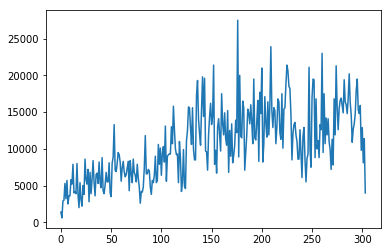

In [39]:
plt.figure()
plt.plot(data)

In [40]:
len(data)

304

In [41]:
plt.show()

In [46]:
!pip install pandas

    100% |████████████████████████████████| 8.9MB 1.6MB/s ta 0:00:011


In [50]:
import pandas as pd

In [51]:
dataDF = pd.DataFrame(data)

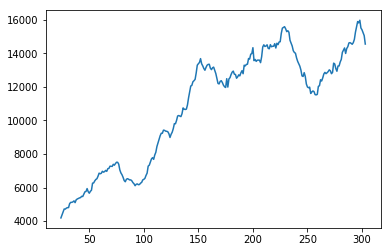

In [52]:
plt.plot(dataDF.rolling(window=25).mean())

In [ ]:
16*300

# Behavior Vids [ frame capture from agent chosen actions at var points in learning curve]

<code>user selects P=3 points -- 
       build code to run inference on checkpointed model
        @ closest available make P video loops; NF=100 frames per video loop</code>


TODO: determine frame to checkpoint mapping

In [25]:
import torch

In [26]:
modelCheckpoint = torch.load('/workspace/pytorch-a2c-ppo-acktr/trained_models/ppo/KungFuMasterNoFrameskip-v0.pt')

In [27]:
type(modelCheckpoint)

list

In [28]:
model = modelCheckpoint[0]

In [29]:
model.eval()

Policy(
  (base): CNNBase(
    (main): Sequential(
      (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten()
      (7): Linear(in_features=1568, out_features=512, bias=True)
      (8): ReLU()
    )
    (critic_linear): Linear(in_features=512, out_features=1, bias=True)
  )
  (dist): Categorical(
    (linear): Linear(in_features=512, out_features=14, bias=True)
  )
)

In [30]:
for param in modelCheckpoint[0].parameters():
    print(type(param.data), param.size())

<class 'torch.Tensor'> torch.Size([32, 4, 8, 8])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([64, 32, 4, 4])
<class 'torch.Tensor'> torch.Size([64])
<class 'torch.Tensor'> torch.Size([32, 64, 3, 3])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([512, 1568])
<class 'torch.Tensor'> torch.Size([512])
<class 'torch.Tensor'> torch.Size([1, 512])
<class 'torch.Tensor'> torch.Size([1])
<class 'torch.Tensor'> torch.Size([14, 512])
<class 'torch.Tensor'> torch.Size([14])


In [31]:
import gym
import matplotlib.pylab as plt

In [32]:
import envs

In [33]:
env = envs.make_env('KungFuMasterNoFrameskip-v0', 0, 0, '', False, False)()

hmm
original observation shape: (84, 84, 1)
new observation shape: (1, 84, 84)


In [ ]:
obs = env.reset()

singleObs = torch.from_numpy(obs).float()
inputBatch = singleObs.repeat(1,4,1,1)
value, action, action_log_probs, rnn_hxs = model.act(inputBatch, [], [] )

chosenAction= int(action.data)

value, action, action_log_probs, rnn_hxs = model.act(inputBatch, [], [] )

chosenAction = int(action.data)

env.action_space.sample()

# model inference & action loop 

In [34]:
fig = plt.figure()
def viz_state( env, step=0, info=""):
    plt.figure(fig.number, figsize=(9,9))
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env.spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())        

<Figure size 432x288 with 0 Axes>

In [35]:
plt.show()

In [36]:
def log ( observation, reward, done ):
    # todo tensorboard
    pass 

In [37]:
observation = env.reset()

In [38]:
observation

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

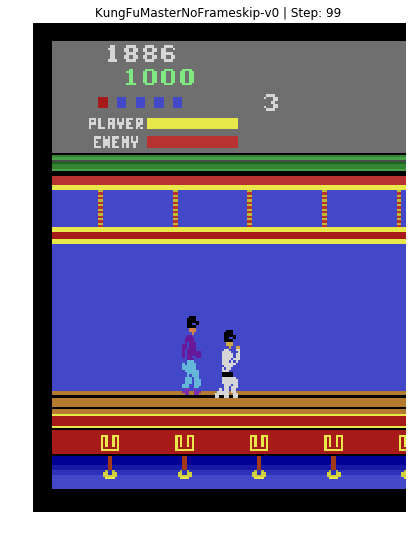

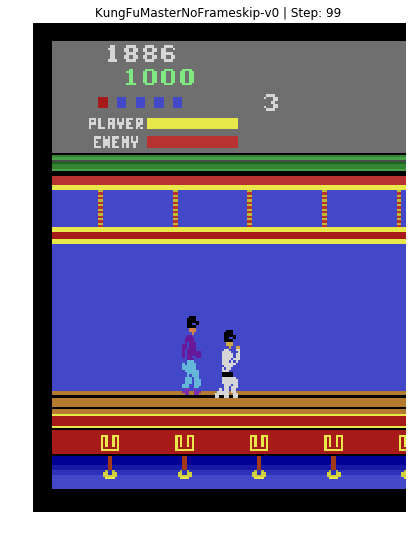

In [40]:
if 'KungFuMaster' in  env.spec.id:    
    for i in range(100):
        singleObs = torch.from_numpy(observation).float()
        inputBatch = singleObs.repeat(1,4,1,1)
        value, action, action_log_probs, rnn_hxs = model.act(inputBatch, [], [] )
        chosenAction= int(action.data)
        
        #chosenAction = env.action_space.sample() # TODO: run model inference
        observation, reward, done, info = env.step( chosenAction )
        #log( observation, reward, done )
        viz_state(env, i)